# Pré-Aula 02 — Dataset CSV simples + estatística básica

**Disciplina:** Inteligência Artificial  
**Professor:** Marcelo Batista  
**Propósito:** Atenção >>> esta aula, inda **não é modelagem de IA** — é o ritual de trabalho: carregar um CSV, medir o básico, fazer 2 gráficos e escrever conclusões **sem inventar causalidade**.

---

**Regra de ouro:** correlação **não** prova causalidade.

In [52]:
# Imports e configuração visual
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

print("Python:", sys.version.split()[0])
print("pandas:", pd.__version__)
print("seaborn:", sns.__version__)

Python: 3.12.12
pandas: 2.2.2
seaborn: 0.13.2


## Gerando um dataset simples

Este dataset é **sintético**, criado só para praticar:
- leitura de tabela
- estatística descritiva
- correlação (com interpretação correta)
- groupby
- gráficos

In [53]:
np.random.seed(42)

n = 200
df = pd.DataFrame({
    "student_id": np.arange(1, n+1),
    "gender": np.random.choice(["female", "male"], size=n, p=[0.55, 0.45]),
    "age": np.random.randint(17, 31, size=n),
    "study_hours": np.round(np.random.gamma(shape=2.0, scale=2.0, size=n), 1),
    "absences": np.random.poisson(lam=2.0, size=n),
})

noise = np.random.normal(0, 8, size=n)
df["final_score"] = np.clip(50 + 4.0*df["study_hours"] - 2.5*df["absences"] + noise, 0, 100).round(1)

df.head(10)

,student_id,gender,age,study_hours,absences,final_score
0,1,female,24,2.5,0,81.1
1,2,male,20,2.6,6,46.0
2,3,male,27,6.4,3,57.8
3,4,male,17,7.8,3,81.7
4,5,female,24,4.4,2,58.6
5,6,female,20,9.7,4,66.3
6,7,female,22,1.8,0,53.8
7,8,male,24,1.0,2,61.0
8,9,male,20,2.8,1,65.5
9,10,male,30,10.9,3,83.3


In [54]:
# Salvar CSV
csv_path = "students_simple.csv"
df.to_csv(csv_path, index=False)

import os
print("Salvo em:", os.path.abspath(csv_path))

Salvo em: /content/students_simple.csv


In [55]:
# Ler CSV de volta
df = pd.read_csv(csv_path)
df.head(10)

,student_id,gender,age,study_hours,absences,final_score
0,1,female,24,2.5,0,81.1
1,2,male,20,2.6,6,46.0
2,3,male,27,6.4,3,57.8
3,4,male,17,7.8,3,81.7
4,5,female,24,4.4,2,58.6
5,6,female,20,9.7,4,66.3
6,7,female,22,1.8,0,53.8
7,8,male,24,1.0,2,61.0
8,9,male,20,2.8,1,65.5
9,10,male,30,10.9,3,83.3


## Olhando para a tabela/dados

Antes de qualquer coisa, confirme:
- tamanho do dataset
- colunas
- tipos
- faltantes

In [56]:
print("Linhas, colunas:", df2.shape)
df.info()

Linhas, colunas: (200, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   200 non-null    int64  
 1   gender       200 non-null    object 
 2   age          200 non-null    int64  
 3   study_hours  200 non-null    float64
 4   absences     200 non-null    int64  
 5   final_score  200 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 9.5+ KB


In [57]:
df.columns

Index(['student_id', 'gender', 'age', 'study_hours', 'absences',
       'final_score'],
      dtype='object')

## Valores faltantes

IA na vida real quase sempre tem missing. Aqui é diagnóstico, não “conserto”.

In [58]:
missing = df.isna().sum().sort_values(ascending=False)
faltantes = missing[missing > 0]

if len(faltantes) == 0:
    print("✅ Não há valores faltantes neste dataset.")
else:
    display(faltantes)

✅ Não há valores faltantes neste dataset.


## Estatísticas descritivas (describe)

Isso dá noção de escala, dispersão e possíveis outliers.

In [59]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
student_id,200.0,NaN,NaN,NaN,100.5,57.879185,1.0,50.75,100.5,150.25,200.0
gender,200,2,female,116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,200.0,NaN,NaN,NaN,23.295,4.180353,17.0,20.0,23.0,27.0,30.0
study_hours,200.0,NaN,NaN,NaN,4.1725,2.812248,0.3,2.1,3.45,5.825,14.4
absences,200.0,NaN,NaN,NaN,1.99,1.337477,0.0,1.0,2.0,3.0,6.0
final_score,200.0,NaN,NaN,NaN,62.358,13.993341,26.3,51.6,60.95,72.4,100.0


## Medidas

Vamos calcular para `final_score`:
- média
- mediana
- desvio padrão

In [60]:
col = "final_score"

media = df[col].mean()
mediana = df[col].median()
desvio = df[col].std()

print("Coluna:", col)
print("Média:", media)
print("Mediana:", mediana)
print("Desvio padrão:", desvio)

Coluna: final_score
Média: 62.35799999999999
Mediana: 60.95
Desvio padrão: 13.993341417263446


### Interpretação (escreva em português)

Escreva aqui (2–4 linhas):
- O que significa a **média** nesse dataset?
- A **mediana** está perto da média ou bem diferente?
- O **desvio padrão** sugere pouca ou muita variação?

**Regra:** interpretação objetiva; sem filosofia.

## Correlação (intuição, sem causalidade)

Vamos medir associação entre:
- `study_hours` (X)
- `final_score` (Y)

**Lembrete:** correlação sugere relação linear, não prova causa.

In [61]:
x, y = "study_hours", "final_score"
corr = df[[x, y]].corr(numeric_only=True).loc[x, y]
corr

np.float64(0.7513410606708726)

### Interpretação correta da correlação

Complete (1–2 frases):
- O sinal (positivo/negativo) indica que quando **X** aumenta, **Y** tende a ________.
- A força dessa correlação parece (fraca/moderada/forte) e por quê.

**Proibido nesta aula:** “estudar causa nota maior”.  
**Permitido:** “há associação positiva entre horas de estudo e nota”.

## Groupby — leitura de resultados

Vamos criar uma tabela resumo por grupo (ex.: `gender`).

A ideia é responder:
> “Em média, os grupos diferem? Qual a variabilidade? Quantos casos por grupo?”

In [62]:
summary = (
    df.groupby("gender")
      .agg(
          n=("final_score", "size"),
          mean_score=("final_score", "mean"),
          median_score=("final_score", "median"),
          std_score=("final_score", "std"),
          mean_absences=("absences", "mean"),
          mean_study_hours=("study_hours", "mean"),
      )
      .sort_values("mean_score", ascending=False)
)

summary

,n,mean_score,median_score,std_score,mean_absences,mean_study_hours
gender,,,,,,
female,116,62.614655,60.5,13.389225,2.00000,4.167241
male,84,62.003571,61.1,14.861817,1.97619,4.179762


### Interpretação do groupby (sem inventar causalidade)

Escreva 2–5 linhas:
- Qual grupo tem maior média de `final_score`?
- Os tamanhos (`n`) são parecidos ou muito diferentes?
- O que o `std_score` sugere sobre variabilidade dentro dos grupos?

## Gráficos mínimos (2 gráficos)

Você **não responde na cabeça**. Você responde gerando gráficos e descrevendo objetivamente:
- Gráfico 1: scatter (X vs Y)
- Gráfico 2: distribuição por grupo (boxplot)

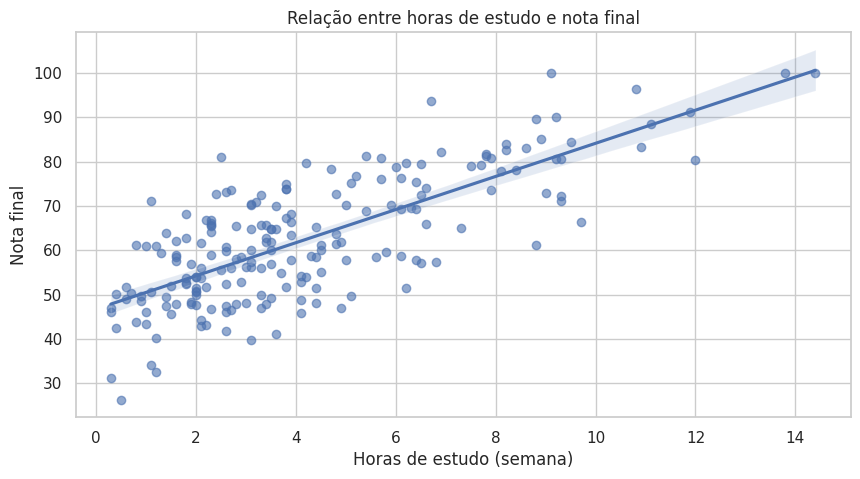

In [63]:
sns.regplot(data=df, x="study_hours", y="final_score", scatter_kws={"alpha": 0.6})
plt.title("Relação entre horas de estudo e nota final")
plt.xlabel("Horas de estudo (semana)")
plt.ylabel("Nota final")
plt.show()

### Interpretação do Gráfico 1

Responda objetivamente:
- A tendência geral parece crescente, decrescente ou sem padrão?
- Há muitos pontos “fora do padrão” (outliers visuais)?

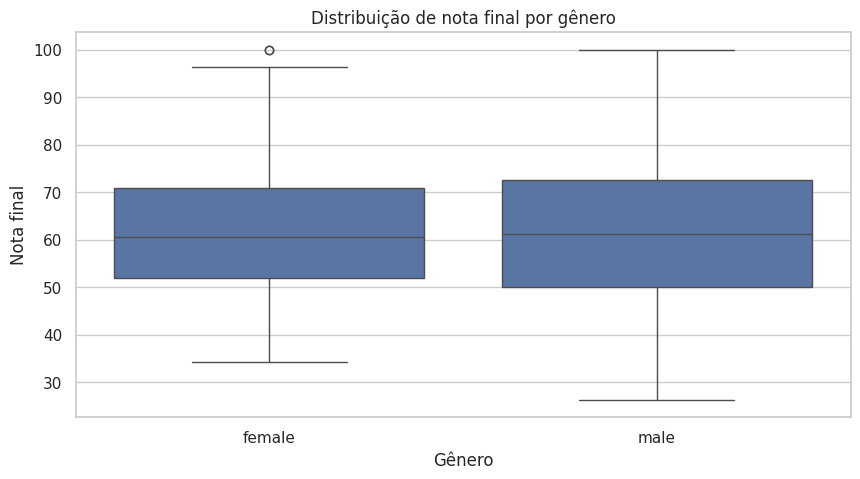

In [64]:
sns.boxplot(data=df, x="gender", y="final_score")
plt.title("Distribuição de nota final por gênero")
plt.xlabel("Gênero")
plt.ylabel("Nota final")
plt.show()

### Interpretação do Gráfico 2

Responda objetivamente:
- Qual grupo parece ter mediana maior?
- Qual grupo parece ter maior dispersão (caixa/whiskers maiores)?

# Texto de sugestão para o README (entrega)

Copie o texto abaixo para o arquivo `Pre_Aula_02/README.md` no GitHub:

Utilize o README.md para registrar todos os insight de sua entrega

# Pré-Aula 02 — Estatística básica com CSV

## Dataset
- Fonte: (CSV foi gerado para treino)

## O que os dados sugerem (sem causalidade)
- (1) Associação observada (ex.: study_hours vs final_score): …
- (2) Diferenças por grupo (groupby): …
- (3) Variabilidade (desvio padrão / boxplot): …

## Limitações
- Correlação não implica causalidade.
- Variáveis omitidas podem influenciar os resultados.
- Amostra/qualidade do dado podem limitar conclusões.



# Fechamento

**CSV → checagem → estatística → correlação → groupby → gráficos → interpretação honesta → entrega.**